<b>ПИ19-3 Деменчук Георгий</b><br>
ML4.2 Предобработка данных

In [44]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

### Портим исходный датасет

In [ ]:
#TODO

1.	На сайте https://www.kaggle.com/datasets выбрать набор данных каждому студенту индивидуально. Лучше всего выбирать датасеты в предметной области исходя из личных предпочтений. Не стоит выбирать слишком большие наборы данных (лучше не более 100 Мб). 

https://www.kaggle.com/datasets/chitwanmanchanda/fraudulent-transactions-data

step - обозначает единицу времени в реальном мире. В данном случае 1 шаг - это 1 час времени. Всего шагов 744 (30 дней моделирования).

type - CASH-IN, CASH-OUT, DEBIT, PAYMENT and TRANSFER.

amount - сумма транзакции в местной валюте.

nameOrig - клиент, который начал транзакцию

oldbalanceOrg - начальный баланс до транзакции

newbalanceOrig - новый баланс после транзакции

nameDest - клиент, являющийся получателем транзакции

oldbalanceDest - получатель начального баланса до транзакции. Обратите внимание, что информация для клиентов, начинающихся на M (Merchants), отсутствует.

newbalanceDest - получатель нового баланса после транзакции. Обратите внимание, что информация для клиентов, начинающихся с M (Merchants), отсутствует.

isFraud - это транзакции, совершенные агентами-мошенниками внутри симуляции. В данном конкретном наборе данных мошенническое поведение агентов направлено на получение прибыли путем захвата контроля над счетами клиентов и попытки опустошения средств путем перевода на другой счет и последующего обналичивания из системы.

isFlaggedFraud -  бизнес-модель нацелена на контроль массовых переводов с одного счета на другой и отмечает незаконные попытки. Незаконной попыткой в данном наборе данных считается попытка перевести более 200.000 за одну транзакцию.

In [45]:
df = pd.read_csv("./data/Fraud.csv")
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


2.	В начале анализа следует привести общую характеристику набора данных: количество наблюдений, признаков, предметная область, содержание признаков, характер целевой переменной, задача обучения (регрессия, классификация, количество классов).

In [46]:
df.shape

(6362620, 11)

In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [48]:
df.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


Всего 6362620 наблюдения, 11 факторов

Предметная область - банковские транзакции, датасет содержит данные о подозрительных банковских транзакциях

Рассматирваемая задача является задачей бинарной классификации

In [49]:
set(df["isFraud"].to_list())

{0, 1}

Целевая переменная - isFraud

#### Работа с категориальными признаками

In [50]:
cat = [i for i in df.columns if df[i].dtypes == 'O']
cat

['type', 'nameOrig', 'nameDest']

In [55]:
for item in cat:
    print(f"{item} -> {len(set(df[item].to_list()))}")

type -> 5
nameOrig -> 6353307
nameDest -> 2722362


Посмотрим на type

/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


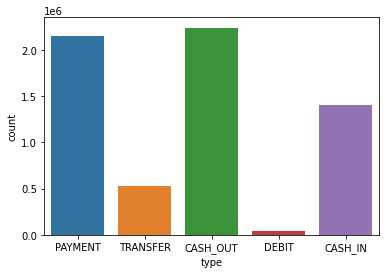

In [41]:
sns.countplot(df['type']);

/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='step', ylabel='Density'>

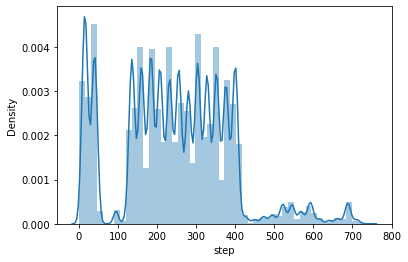

In [31]:
sns.distplot(df['step'])

/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='amount', ylabel='Density'>

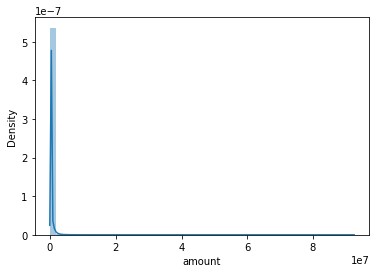

In [37]:
sns.distplot(df['amount'])

In [33]:
fraud = df[df['isFraud'] == 1]

/Users/demg/miniforge3/envs/env_tf/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


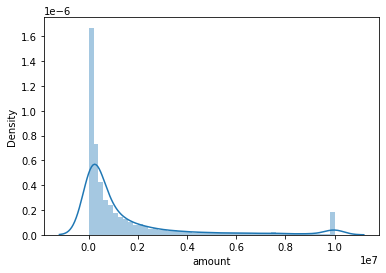

In [34]:
sns.distplot(fraud['amount']);

In [26]:
df['isFraud'].value_counts()

0    6354407
1       8213
Name: isFraud, dtype: int64

In [57]:
num = [i for i in df.columns if df[i].dtypes != 'O']
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

3.	Провести в Jupyter средствами pandas, sklearn, seaborn описательный анализ выбранного набора включающего (но не ограниченного) следующие шаги:<br>
a.	исследование шкалы измерения каждого существенного признака;<br>
b.	построение эмпирического распределения каждого существенного признака;<br>
c.	анализ количества и распределения отсутствующих значений;<br>
d.	построение совместного распределения каждого признака и целевой переменной;<br>
e.	построение корреляционной матрицы.<br>


#### Исследование шкалы измерения каждого существенного признака;

In [9]:
from typing import Tuple, Union

def scale_values_getter(value: pd.Series) -> Tuple[np.dtype, int, Union[int, str], Union[int, str], list]:

    uniq_values = sorted(value.unique())
    shape_value = len(uniq_values)
    min_value = pd.Series(uniq_values).dropna().min()
    max_value = pd.Series(uniq_values).dropna().max()
    
    #Если категориальный признак-строка - нет смысла искать max/min
    if value.dtype == object:
        min_value, max_value = "-"*2

    return value.dtype, shape_value, min_value, max_value, uniq_values


res = df.apply(scale_values_getter).transpose()
res.columns = ["type","shape","min_value", "max_value", "uniq_values"]
res

,type,shape,min_value,max_value,uniq_values
step,int64,743,1,743,"[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14..."
type,object,5,-,-,"[CASH_IN, CASH_OUT, DEBIT, PAYMENT, TRANSFER]"
amount,float64,5316900,0.0,92445516.64,"[0.0, 0.01, 0.02, 0.03, 0.04, 0.06, 0.07, 0.09..."
nameOrig,object,6353307,-,-,"[C1000000639, C1000001337, C1000001725, C10000..."
oldbalanceOrg,float64,1845844,0.0,59585040.37,"[0.0, 0.05, 0.18, 0.21, 0.44, 0.67, 1.0, 1.02,..."
newbalanceOrig,float64,2682586,0.0,49585040.37,"[0.0, 0.01, 0.03, 0.05, 0.12, 0.13, 0.18, 0.21..."
nameDest,object,2722362,-,-,"[C1000004082, C1000004940, C1000013769, C10000..."
oldbalanceDest,float64,3614697,0.0,356015889.35,"[0.0, 0.01, 0.03, 0.13, 0.33, 0.37, 0.79, 1.0,..."
newbalanceDest,float64,3555499,0.0,356179278.92,"[0.0, 0.01, 0.33, 1.39, 1.64, 1.74, 2.15, 2.45..."
isFraud,int64,2,0,1,"[0, 1]"


#### Построение эмпирического распределения каждого существенного признака;

In [60]:
num

['step',
 'amount',
 'oldbalanceOrg',
 'newbalanceOrig',
 'oldbalanceDest',
 'newbalanceDest',
 'isFraud',
 'isFlaggedFraud']

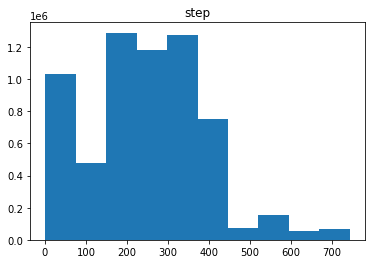

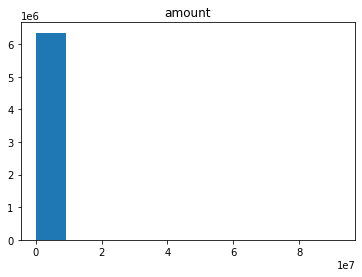

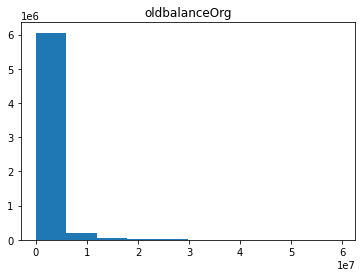

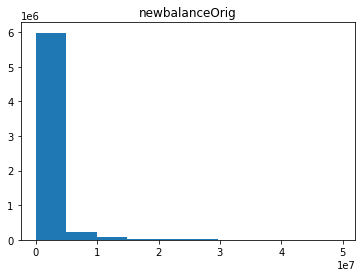

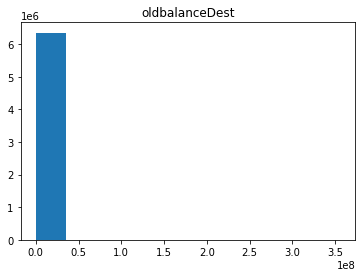

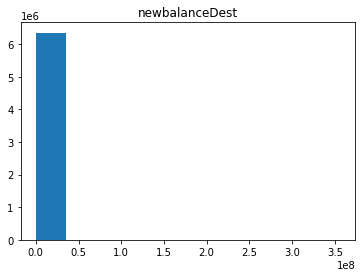

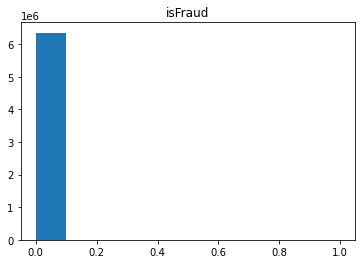

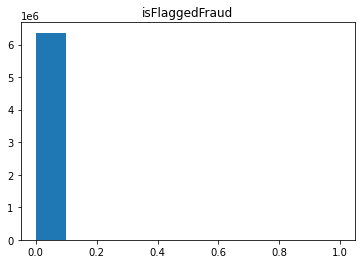

In [59]:
for column in num:
    plt.hist(df[column])
    plt.title(column)
    plt.show()

step хоть как-то близок к нормальному распределнию, в остальном - ничего

#### Анализ количества и распределения отсутствующих значений

In [61]:
null_df = df.isna().sum()
null_df[null_df == 0]

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

#### Построение совместного распределения каждого признака и целевой переменной

In [ ]:
#TODO

#### Построение корреляционной матрицы

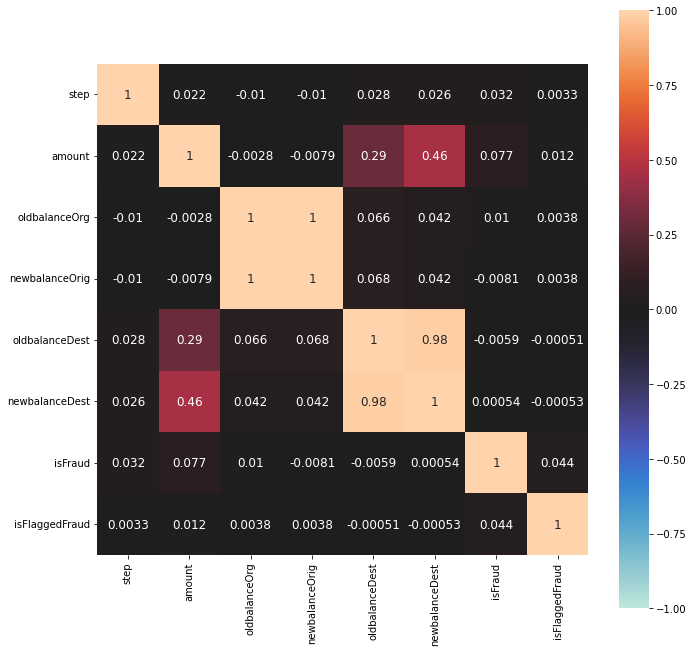

In [67]:
ax = sns.heatmap(
    df.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11)

Для целевой переменной isFraud особых корреляций от отдельного фактора не выявлено

#### 5.	Провести подготовительную обработку данных, включающую следующие шаги:<br>
a.	удаление или заполнение отсутствующих значений;<br>
b.	приведение всех признаков к бинарной либо числовой шкале;<br>
c.	удаление несущественных либо избыточных признаков;<br>
d.	другие необходимые действия в зависимости от набора данных и задачи (группировка, удаление аномалий, и др.).<br>

In [71]:
new_df = df.copy()
new_df

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


Т.к. записей очень много, то просто удаляем те, где нет каких-либо значений.<br>
Если же значений было бы мало, то руководствуемся след алгоритмом:<br>
    - Если фактор категориальный, то ставим значение моды по нему (в случае type)<br>
    - Если фактор числовой и ассиметрия достаточно большая, то можно взять среднее<br>
    - Если фактор числовой и ассиметрия не очень большая, то можно взять медиану<br>

In [ ]:
#TODO удаление

In [ ]:
Все категориальные признаки меняем на числовые

In [ ]:
#TODO замена

6.	Количественные характеристики датасета необходимо также привести после его обработки.